<a href="https://colab.research.google.com/github/maherelhachem/INSE6220/blob/main/Sample_Project_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [9]:
from google.colab import files
uploaded = files.upload()

Saving column_3C.csv to column_3C.csv


In [10]:
!pip install -q xlrd
import pandas as pd
df = pd.read_csv('column_3C.csv')
df.head (n=25)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          63.027817    22.552586              39.609117     40.475232   
1          39.056951    10.060991              25.015378     28.995960   
2          68.832021    22.218482              50.092194     46.613539   
3          69.297008    24.652878              44.311238     44.644130   
4          49.712859     9.652075              28.317406     40.060784   
5          40.250200    13.921907              25.124950     26.328293   
6          53.432928    15.864336              37.165934     37.568592   
7          45.366754    10.755611              29.038349     34.611142   
8          43.790190    13.533753              42.690814     30.256437   
9          36.686353     5.010884              41.948751     31.675469   
10         49.706610    13.040974              31.334500     36.665635   
11         31.232387    17.715819              15.500000     13.516568   
12         48.915551    19.964556              40.263794     28.950995   
13         53.572170    20.460828              33.100000     33.111342   
14         57.300227    24.188885              47.000000     33.111342   
15         44.318907    12.537992              36.098763     31.780915   
16         63.834982    20.362507              54.552434     43.472475   
17         31.276012     3.144669              32.562996     28.131342   
18         38.697912    13.444749              31.000000     25.253163   
19         41.729963    12.254074              30.122586     29.475889   
20         43.922840    14.177959              37.832547     29.744881   
21         54.919443    21.062332              42.200000     33.857110   
22         63.073611    24.413803              54.000000     38.659808   
23         45.540790    13.069598              30.298321     32.471192   
24         36.125683    22.758753              29.000000     13.366931   

    pelvic_radius  degree_spondylolisthesis   class  
0       98.672917                 -0.254400  Hernia  
1      114.405425                  4.564259  Hernia  
2      105.985135                 -3.530317  Hernia  
3      101.868495                 11.211523  Hernia  
4      108.168725                  7.918501  Hernia  
5      130.327871                  2.230652  Hernia  
6      120.567523                  5.988551  Hernia  
7      117.270067                -10.675871  Hernia  
8      125.002893                 13.289018  Hernia  
9       84.241415                  0.664437  Hernia  
10     108.648265                 -7.825986  Hernia  
11     120.055399                  0.499751  Hernia  
12     119.321358                  8.028895  Hernia  
13     110.966698                  7.044803  Hernia  
14     116.806587                  5.766947  Hernia  
15     124.115836                  5.415825  Hernia  
16     112.309491                 -0.622527  Hernia  
17     129.011418                  3.623020  Hernia  
18     123.159251                  1.429186  Hernia  
19     116.585706                 -1.244402  Hernia  
20     134.461016                  6.451648  Hernia  
21     125.212716                  2.432561  Hernia  
22     106.424329                 15.779697  Hernia  
23     117.980830                 -4.987130  Hernia  
24     115.577116                 -3.237562  Hernia

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [12]:
# to change class column into unique values 
df ['class'].unique()
# to count the class variables 
df ['class'][df['class']=='Hernia'].value_counts()
df ['class'][df ['class']=='Spondylolisthesis'].value_counts()
df ['class'][df ['class']=='Normal'].value_counts()

labels, levels = pd.factorize(df['class'])
df['class']= labels

In [14]:
# to convert string to numeric     


for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')   

In [13]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [15]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

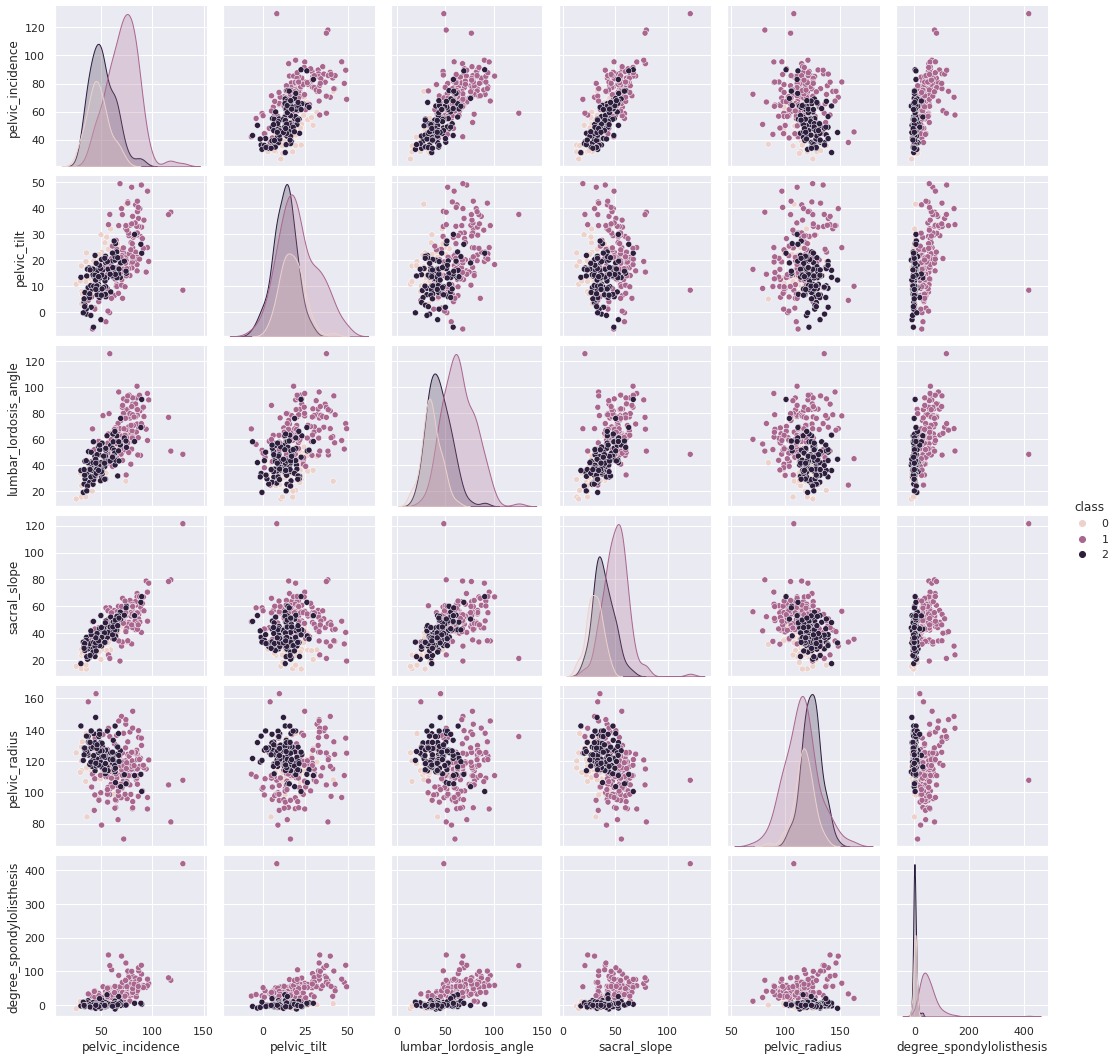

In [16]:
sns.pairplot(df, hue='class')
plt.show()

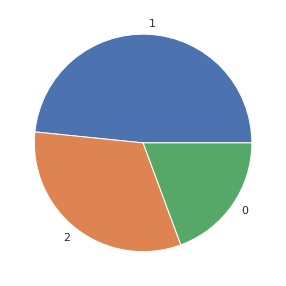

In [17]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [18]:
X = df.drop(columns=['class'])
X.head(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis  
0      98.672917                 -0.254400  
1     114.405425                  4.564259  
2     105.985135                 -3.530317  
3     101.868495                 11.211523  
4     108.168725                  7.918501  
5     130.327871                  2.230652  
6     120.567523                  5.988551  
7     117.270067                -10.675871  
8     125.002893                 13.289018  
9      84.241415                  0.664437

In [19]:
X.describe().transpose()

count        mean        std        min         25%  \
pelvic_incidence          310.0   60.496653  17.236520  26.147921   46.430294   
pelvic_tilt               310.0   17.542822  10.008330  -6.554948   10.667069   
lumbar_lordosis_angle     310.0   51.930930  18.554064  14.000000   37.000000   
sacral_slope              310.0   42.953831  13.423102  13.366931   33.347122   
pelvic_radius             310.0  117.920655  13.317377  70.082575  110.709196   
degree_spondylolisthesis  310.0   26.296694  37.559027 -11.058179    1.603727   

                                 50%         75%         max  
pelvic_incidence           58.691038   72.877696  129.834041  
pelvic_tilt                16.357689   22.120395   49.431864  
lumbar_lordosis_angle      49.562398   63.000000  125.742385  
sacral_slope               42.404912   52.695889  121.429566  
pelvic_radius             118.268178  125.467675  163.071041  
degree_spondylolisthesis   11.767933   41.287352  418.543082

**Standardize the Data**

In [20]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.147086     0.501369              -0.665177     -0.184950   
1         -1.245864    -0.748769              -1.453001     -1.041521   
2          0.484370     0.467932              -0.099262      0.273083   
3          0.511390     0.711562              -0.411339      0.126128   
4         -0.626648    -0.789693              -1.274745     -0.215876   
5         -1.176524    -0.362375              -1.447086     -1.240579   
6         -0.410474    -0.167980              -0.797069     -0.401840   
7         -0.879201    -0.679253              -1.235826     -0.622522   
8         -0.970815    -0.401221              -0.498816     -0.947465   
9         -1.383620    -1.254175              -0.538875     -0.841579   

   pelvic_radius  degree_spondylolisthesis  
0      -1.447647                 -0.708059  
1      -0.264385                 -0.579556  
2      -0.897686                 -0.795421  
3      -1.207303                 -0.402288  
4      -0.733455                 -0.490106  
5       0.933162                 -0.641789  
6       0.199074                 -0.541574  
7      -0.048932                 -0.985977  
8       0.532664                 -0.346886  
9      -2.533058                 -0.683556

In [21]:
X.describe().transpose()

count          mean       std       min       25%  \
pelvic_incidence          310.0  8.452020e-17  1.001617 -1.996010 -0.817398   
pelvic_tilt               310.0 -2.650210e-17  1.001617 -2.411664 -0.688114   
lumbar_lordosis_angle     310.0 -3.918013e-16  1.001617 -2.047652 -0.806027   
sacral_slope              310.0 -2.435328e-17  1.001617 -2.207741 -0.716842   
pelvic_radius             310.0  3.312762e-16  1.001617 -3.597963 -0.542383   
degree_spondylolisthesis  310.0  1.454034e-16  1.001617 -0.996173 -0.658507   

                               50%       75%        max  
pelvic_incidence         -0.104925  0.719464   4.029206  
pelvic_tilt              -0.118606  0.458116   3.191402  
lumbar_lordosis_angle    -0.127862  0.597549   3.984615  
sacral_slope             -0.040960  0.726941   5.855771  
pelvic_radius             0.026138  0.567621   3.395818  
degree_spondylolisthesis -0.387450  0.399768  10.460350

**Observations and variables**

In [22]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

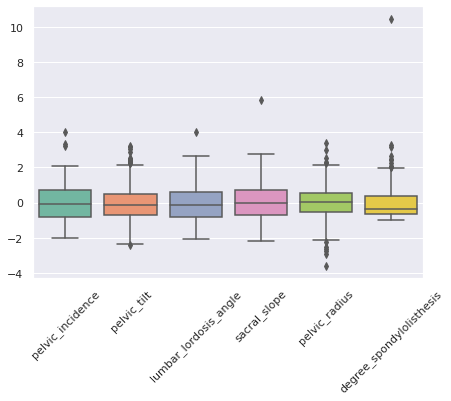

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

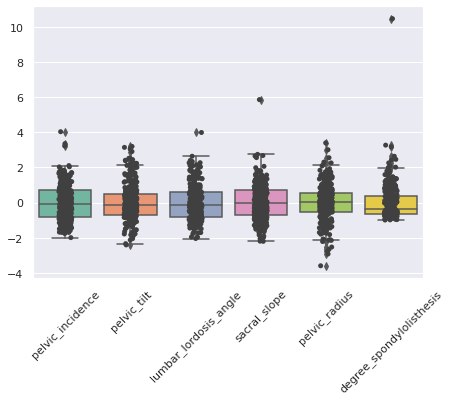

In [24]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

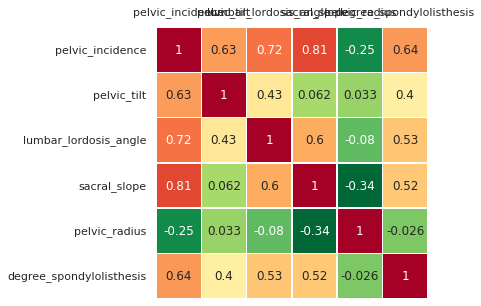

In [25]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

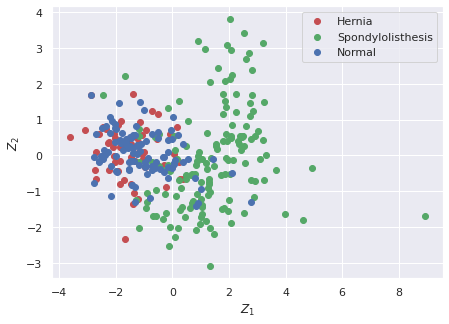

In [26]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Hernia = np.where(y == 0)
idx_Spondylolisthesis = np.where(y == 1)
idx_Normal = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Hernia,0], Z[idx_Hernia,1], c='r', label='Hernia')
plt.scatter(Z[idx_Spondylolisthesis,0], Z[idx_Spondylolisthesis,1], c='g', label='Spondylolisthesis')
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='b', label='Normal')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

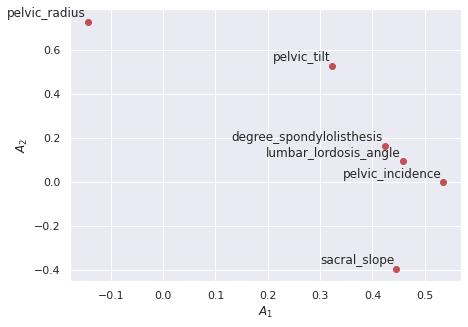

In [27]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


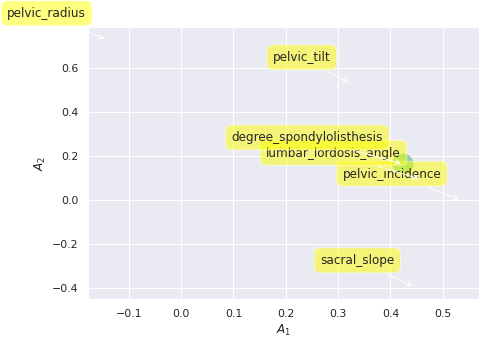

In [28]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

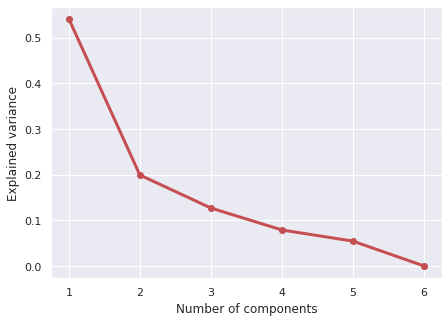

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

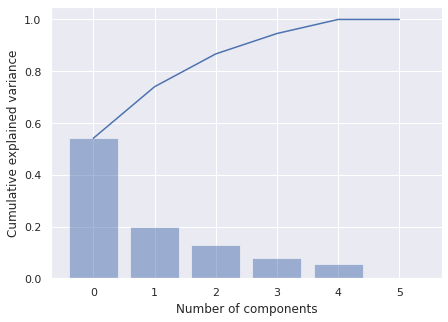

In [30]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

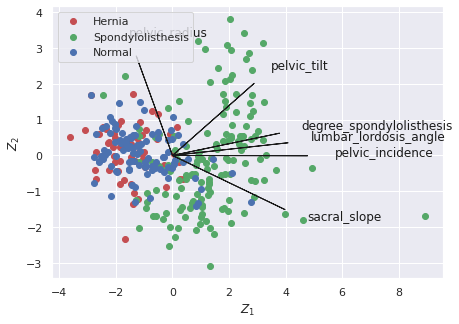

In [32]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Hernia,0], Z[idx_Hernia,1], c='r', label='Hernia')
plt.scatter(Z[idx_Spondylolisthesis,0], Z[idx_Spondylolisthesis,1], c='g', label='Spondylolisthesis')
plt.scatter(Z[idx_Normal,0], Z[idx_Normal,1], c='b', label='Normal')
plt.legend(loc='upper left')

##**Using PCA Library**

In [33]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=44c168ec5507a020d7b43c4956217de6bd1707bf309063d6fcee285cb282e197
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [34]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [35]:
out['PC']

PC1       PC2       PC3       PC4       PC5
0   -0.238623 -0.893126 -1.547663  0.054429 -0.306374
1   -2.246635 -0.401364 -0.303298  0.643297  0.017674
2    0.278507 -0.654382 -1.008548 -0.514302 -0.434832
3    0.374460 -0.658015 -1.344500  0.040140 -0.435742
4   -1.373478 -1.061649 -0.262206  0.530596 -0.319709
..        ...       ...       ...       ...       ...
305 -1.541223 -0.187743 -0.280505 -0.015266 -0.151272
306 -1.250275  0.032120 -0.968230  0.277025 -0.527580
307 -0.497436  0.665527 -0.368328 -0.520184 -0.552595
308 -1.530852 -0.407145  0.241547 -0.102060  0.129363
309 -2.447304 -0.097466  0.525047  0.109024  0.419965

[310 rows x 5 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1d585e810>)

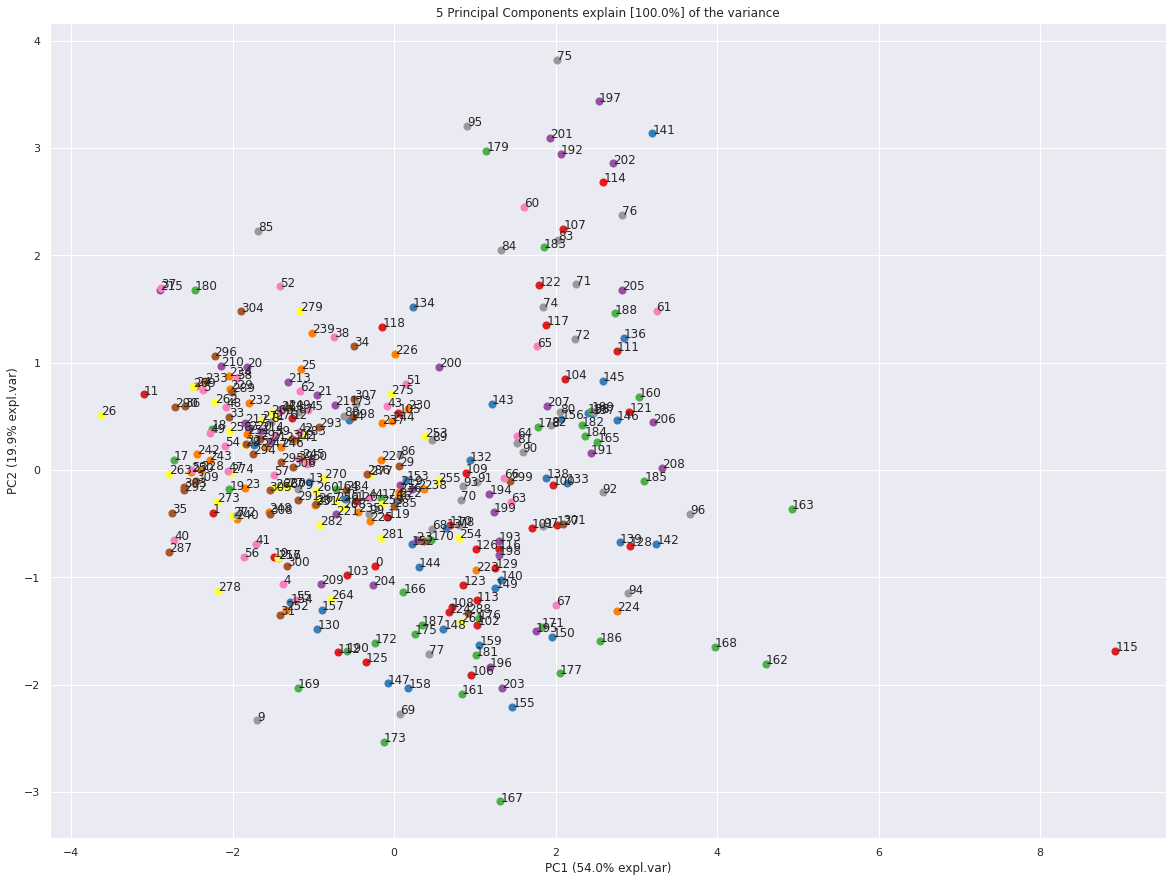

In [36]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [37]:
A = out['loadings'].T

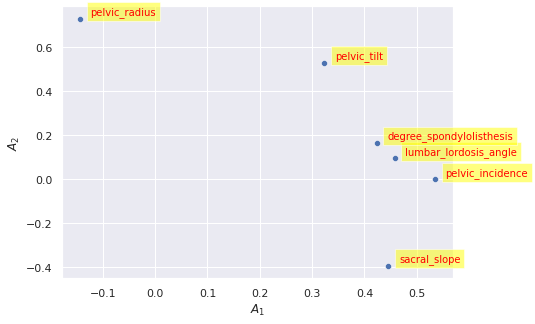

In [38]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

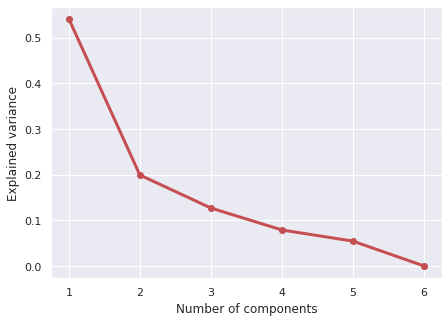

In [39]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

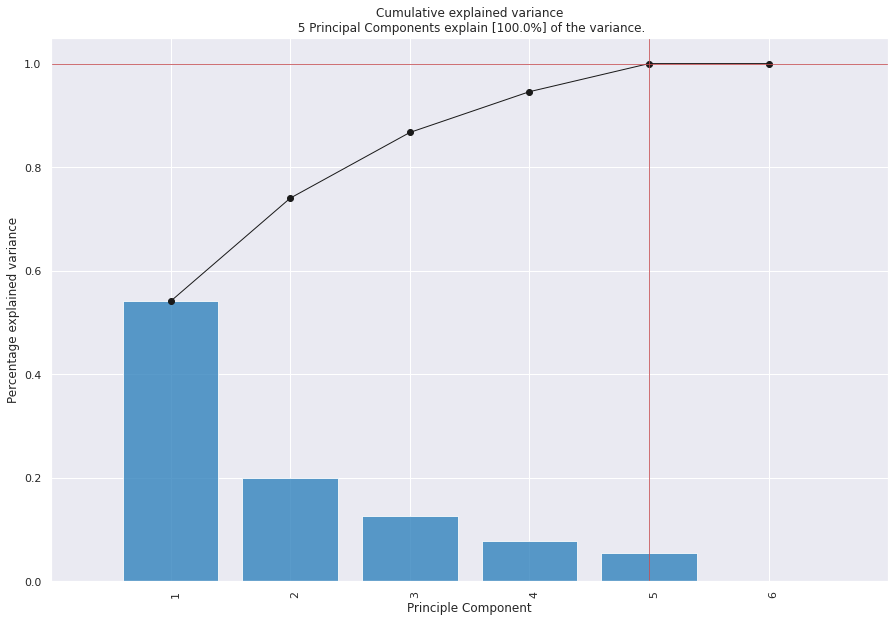

<Figure size 504x360 with 0 Axes>

In [40]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


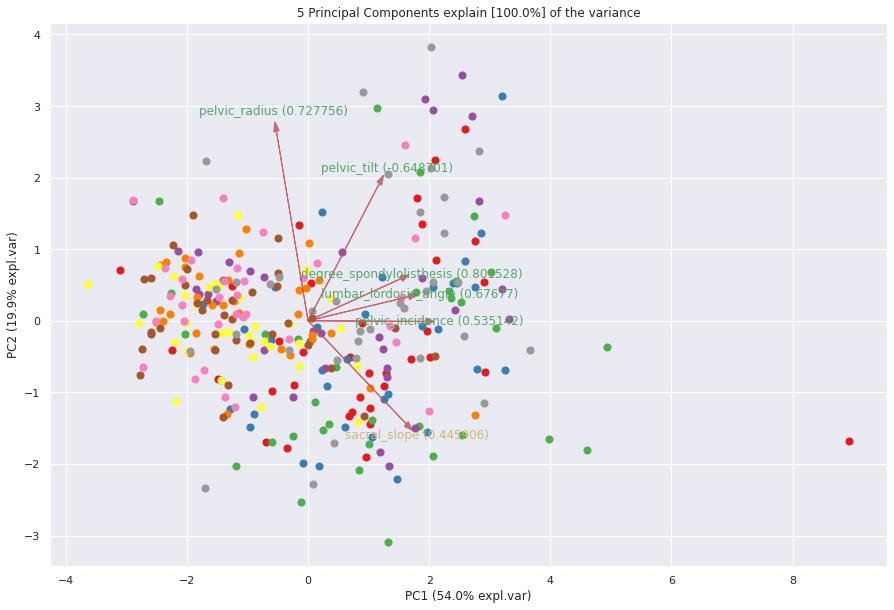

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc1da14d810>)

In [41]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


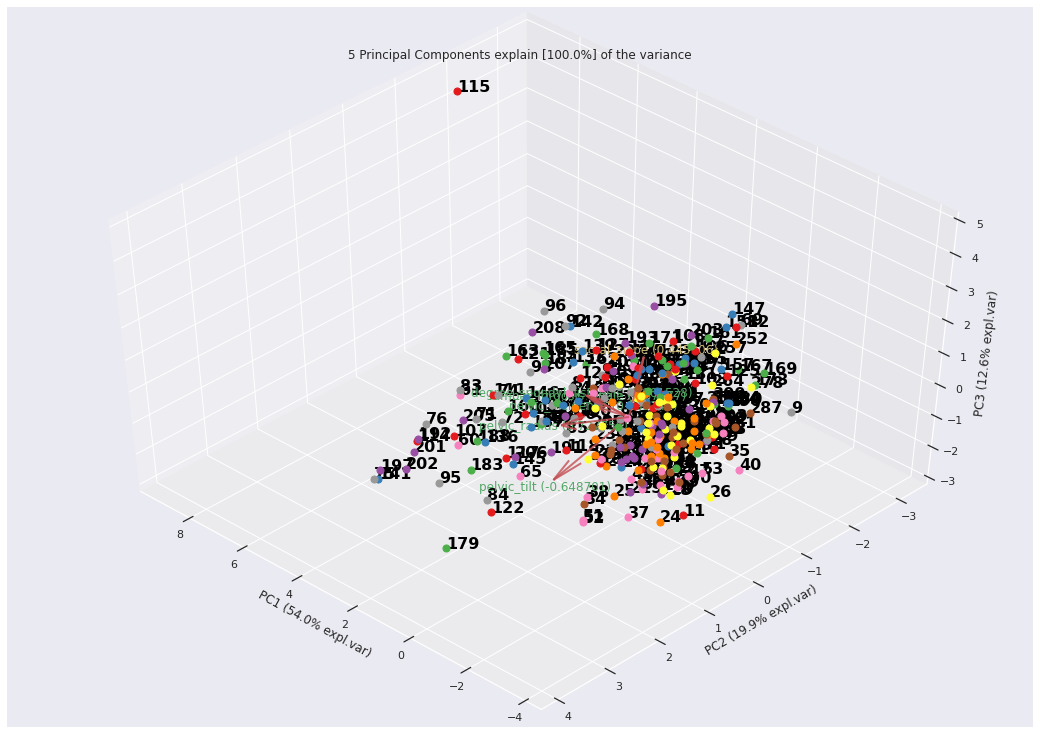

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fc1d53bcc50>)

In [42]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [43]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [44]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (279, 7)
Unseen Data For Predictions: (31, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [45]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (279, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (195, 6)
12                    Transformed Test Set           (84, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              b587
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [46]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8571  0.9699  0.8148  0.8672   
rf               Random Forest Classifier    0.8461  0.9593  0.8130  0.8682   
knn                K Neighbors Classifier    0.8455  0.9533  0.8219  0.8715   
gbc          Gradient Boosting Classifier    0.8408  0.9526  0.8141  0.8556   
et                 Extra Trees Classifier    0.8363  0.9553  0.7930  0.8504   
qda       Quadratic Discriminant Analysis    0.8253  0.9580  0.7726  0.8513   
lightgbm  Light Gradient Boosting Machine    0.8250  0.9511  0.7817  0.8416   
nb                            Naive Bayes    0.8111  0.9478  0.7680  0.8371   
dt               Decision Tree Classifier    0.8095  0.8593  0.7613  0.8205   
ridge                    Ridge Classifier    0.8061  0.0000  0.7719  0.8197   
lda          Linear Discriminant Analysis    0.7961  0.9243  0.7724  0.8204   
svm                   SVM - Linear Kernel    0.7484  0.0000  0.6620  0.6884   
ada                  Ada Boost Classifier    0.7476  0.9085  0.7011  0.7635   
dummy                    Dummy Classifier    0.4818  0.5000  0.3333  0.2324   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8555  0.7719  0.7781     0.450  
rf        0.8451  0.7567  0.7670     0.547  
knn       0.8488  0.7591  0.7679     0.117  
gbc       0.8386  0.7476  0.7560     0.286  
et        0.8281  0.7354  0.7454     0.473  
qda       0.8203  0.7207  0.7347     0.019  
lightgbm  0.8200  0.7235  0.7335     0.095  
nb        0.8006  0.6972  0.7132     0.017  
dt        0.8063  0.6947  0.7002     0.017  
ridge     0.8038  0.6883  0.6950     0.015  
lda       0.7986  0.6786  0.6866     0.019  
svm       0.6900  0.5984  0.6508     0.061  
ada       0.7377  0.6075  0.6300     0.113  
dummy     0.3135  0.0000  0.0000     0.017

In [47]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [48]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9000  0.9286  0.8833  0.9250  0.9023  0.8400  0.8502
1       0.8000  0.8661  0.7222  0.8000  0.8000  0.6774  0.6774
2       0.7500  0.7929  0.6389  0.7881  0.7192  0.5726  0.5929
3       0.9000  0.9143  0.8611  0.9045  0.8976  0.8347  0.8385
4       0.8500  0.8976  0.8222  0.8567  0.8500  0.7683  0.7713
5       0.6842  0.7679  0.6296  0.6842  0.6842  0.5000  0.5000
6       0.7895  0.8513  0.7407  0.8114  0.7917  0.6681  0.6770
7       0.8421  0.8782  0.7778  0.8298  0.8322  0.7444  0.7480
8       0.7368  0.8013  0.7315  0.7528  0.7423  0.5887  0.5913
9       0.8421  0.8949  0.8056  0.8526  0.8437  0.7522  0.7555
Mean    0.8095  0.8593  0.7613  0.8205  0.8063  0.6947  0.7002
SD      0.0672  0.0521  0.0812  0.0672  0.0696  0.1081  0.1080

In [49]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [50]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9142  0.7444  0.8208  0.8023  0.6800  0.6883
1       0.8500  0.9112  0.8056  0.8600  0.8515  0.7600  0.7631
2       0.8500  0.9475  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9000  0.9446  0.8889  0.9167  0.8945  0.8333  0.8486
4       0.8000  0.9085  0.7556  0.8000  0.8000  0.6899  0.6899
5       0.7895  0.9140  0.7963  0.7982  0.7789  0.6724  0.6842
6       0.7895  0.9543  0.7130  0.8421  0.7579  0.6577  0.6872
7       0.8947  0.9235  0.8611  0.9000  0.8937  0.8311  0.8350
8       0.7895  0.8545  0.7593  0.8737  0.7917  0.6696  0.7072
9       0.7368  0.8609  0.6667  0.7474  0.7395  0.5870  0.5895
Mean    0.8200  0.9133  0.7796  0.8419  0.8162  0.7141  0.7256
SD      0.0493  0.0319  0.0630  0.0487  0.0514  0.0755  0.0739

In [51]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [53]:
!pip install statsmodels --upgrade

How to analyze model performance using various plots

In [54]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [55]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9424  0.7944  0.8375  0.8087  0.6875  0.6985
1       0.8000  0.9333  0.7222  0.8000  0.8000  0.6774  0.6774
2       0.9500  0.9830  0.9444  0.9600  0.9505  0.9200  0.9237
3       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
4       0.8000  0.9465  0.7667  0.8179  0.7967  0.6923  0.7031
5       0.8421  0.9457  0.8519  0.9098  0.8516  0.7595  0.7826
6       0.8421  0.9898  0.7963  0.8947  0.8388  0.7489  0.7732
7       0.9474  0.9945  0.9444  0.9579  0.9479  0.9174  0.9214
8       0.7368  0.8992  0.7130  0.7684  0.7444  0.5957  0.6035
9       0.7368  0.8987  0.6852  0.7684  0.7499  0.5923  0.5949
Mean    0.8455  0.9533  0.8219  0.8715  0.8488  0.7591  0.7679
SD      0.0866  0.0355  0.1037  0.0801  0.0840  0.1341  0.1327

**Tune K Neighbors Model**

In [56]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9226  0.7667  0.8800  0.8028  0.6825  0.7171
1       0.7500  0.9533  0.6389  0.7381  0.7418  0.5935  0.5960
2       0.8500  0.9719  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9000  0.9845  0.8889  0.9145  0.8940  0.8374  0.8479
4       0.7500  0.9178  0.7000  0.7350  0.7400  0.6078  0.6103
5       0.9474  0.9816  0.9630  0.9579  0.9487  0.9185  0.9226
6       0.8421  0.9701  0.8241  0.8571  0.8444  0.7478  0.7512
7       0.9474  0.9982  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.8421  0.9227  0.7778  0.8396  0.8369  0.7478  0.7512
9       0.8421  0.9660  0.8519  0.9098  0.8516  0.7595  0.7826
Mean    0.8471  0.9589  0.8133  0.8647  0.8457  0.7571  0.7662
SD      0.0664  0.0272  0.0934  0.0742  0.0685  0.1061  0.1055

**Evaluate K Neighbors Model**

In [57]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [58]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9489  0.7444  0.8208  0.8023  0.6800  0.6883
1       0.8500  0.9567  0.7778  0.8476  0.8451  0.7561  0.7592
2       0.8500  0.9598  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9000  0.9902  0.8611  0.9167  0.8987  0.8319  0.8438
4       0.7500  0.9583  0.7000  0.7350  0.7400  0.6078  0.6103
5       0.9474  0.9842  0.9630  0.9579  0.9487  0.9185  0.9226
6       0.8421  1.0000  0.7963  0.8947  0.8388  0.7489  0.7732
7       0.9474  1.0000  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.7895  0.9390  0.7222  0.7895  0.7895  0.6667  0.6667
9       0.8947  0.9622  0.8611  0.8947  0.8947  0.8333  0.8333
Mean    0.8571  0.9699  0.8148  0.8672  0.8555  0.7719  0.7781
SD      0.0626  0.0207  0.0807  0.0678  0.0642  0.0985  0.0988

**Tune Logistic Regression Model**

In [59]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9489  0.7444  0.8208  0.8023  0.6800  0.6883
1       0.8500  0.9567  0.7778  0.8476  0.8451  0.7561  0.7592
2       0.8500  0.9598  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9500  0.9964  0.9444  0.9545  0.9489  0.9180  0.9220
4       0.7500  0.9583  0.7000  0.7350  0.7400  0.6078  0.6103
5       0.9474  0.9947  0.9630  0.9579  0.9487  0.9185  0.9226
6       0.8421  0.9960  0.7963  0.8947  0.8388  0.7489  0.7732
7       0.9474  1.0000  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.7895  0.9425  0.7222  0.7895  0.7895  0.6667  0.6667
9       0.8947  0.9622  0.8611  0.8947  0.8947  0.8333  0.8333
Mean    0.8621  0.9716  0.8231  0.8710  0.8605  0.7805  0.7859
SD      0.0676  0.0213  0.0889  0.0714  0.0691  0.1068  0.1065

**Evaluate Logistic Regression Model**

In [60]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [61]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8500  0.9745  0.8000  0.9000  0.8470  0.7581  0.7804
1       0.8000  0.9513  0.7222  0.8000  0.8000  0.6774  0.6774
2       0.8500  0.9496  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9500  0.9807  0.9444  0.9545  0.9489  0.9180  0.9220
4       0.8000  0.9690  0.7556  0.8000  0.8000  0.6899  0.6899
5       0.7895  0.9424  0.7963  0.7982  0.7789  0.6724  0.6842
6       0.8421  0.9960  0.7963  0.8947  0.8388  0.7489  0.7732
7       0.9474  0.9924  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.7368  0.8981  0.7037  0.7895  0.7453  0.5905  0.6089
9       0.8947  0.9390  0.8889  0.9298  0.8947  0.8362  0.8509
Mean    0.8461  0.9593  0.8130  0.8682  0.8451  0.7567  0.7670
SD      0.0655  0.0280  0.0762  0.0640  0.0647  0.1016  0.1003

**Tune Random Forest Model**

In [62]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9709  0.7444  0.8208  0.8023  0.6800  0.6883
1       0.8000  0.9429  0.7222  0.8000  0.8000  0.6774  0.6774
2       0.8500  0.9500  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9500  0.9843  0.9444  0.9545  0.9489  0.9180  0.9220
4       0.8500  0.9514  0.8222  0.8567  0.8500  0.7683  0.7713
5       0.8421  0.9494  0.8519  0.8667  0.8439  0.7574  0.7674
6       0.8947  0.9831  0.8796  0.9211  0.8969  0.8341  0.8452
7       0.9474  0.9965  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.7368  0.9061  0.7037  0.7895  0.7453  0.5905  0.6089
9       0.8421  0.9390  0.8333  0.9098  0.8373  0.7564  0.7867
Mean    0.8513  0.9574  0.8224  0.8734  0.8522  0.7658  0.7750
SD      0.0628  0.0254  0.0765  0.0570  0.0609  0.0982  0.0962

**Evaluate Random Forest Model**

In [63]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [64]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8000  0.9489  0.7444  0.8208  0.8023  0.6800  0.6883
1       0.8500  0.9567  0.7778  0.8476  0.8451  0.7561  0.7592
2       0.8500  0.9598  0.8056  0.8600  0.8515  0.7600  0.7631
3       0.9500  0.9964  0.9444  0.9545  0.9489  0.9180  0.9220
4       0.7500  0.9583  0.7000  0.7350  0.7400  0.6078  0.6103
5       0.9474  0.9947  0.9630  0.9579  0.9487  0.9185  0.9226
6       0.8421  0.9960  0.7963  0.8947  0.8388  0.7489  0.7732
7       0.9474  1.0000  0.9167  0.9549  0.9456  0.9159  0.9201
8       0.7895  0.9425  0.7222  0.7895  0.7895  0.6667  0.6667
9       0.8947  0.9622  0.8611  0.8947  0.8947  0.8333  0.8333
Mean    0.8621  0.9716  0.8231  0.8710  0.8605  0.7805  0.7859
SD      0.0676  0.0213  0.0889  0.0714  0.0691  0.1068  0.1065

In [ ]:
tuned_best_model

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [66]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type        Multiclass
3                            Label Encoded              None
4                            Original Data          (279, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (195, 3)
12                    Transformed Test Set           (84, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              7955
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [67]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.7545  0.8925  0.7331  0.7659   
qda       Quadratic Discriminant Analysis    0.7447  0.8921  0.7196  0.7729   
lightgbm  Light Gradient Boosting Machine    0.7400  0.9001  0.7104  0.7492   
et                 Extra Trees Classifier    0.7339  0.8854  0.7044  0.7405   
nb                            Naive Bayes    0.7300  0.8971  0.6791  0.7431   
lr                    Logistic Regression    0.7239  0.9035  0.6898  0.7351   
lda          Linear Discriminant Analysis    0.7192  0.8963  0.6698  0.7274   
dt               Decision Tree Classifier    0.7139  0.7814  0.6867  0.7221   
svm                   SVM - Linear Kernel    0.7084  0.0000  0.6702  0.7063   
knn                K Neighbors Classifier    0.7037  0.8819  0.6676  0.7268   
ridge                    Ridge Classifier    0.7037  0.0000  0.6370  0.7213   
gbc          Gradient Boosting Classifier    0.6984  0.8799  0.6659  0.7058   
ada                  Ada Boost Classifier    0.6824  0.8398  0.6580  0.7336   
dummy                    Dummy Classifier    0.4818  0.5000  0.3333  0.2324   

              F1   Kappa     MCC  TT (Sec)  
rf        0.7519  0.6098  0.6164     0.484  
qda       0.7468  0.5960  0.6034     0.018  
lightgbm  0.7375  0.5839  0.5886     0.084  
et        0.7319  0.5717  0.5751     0.472  
nb        0.7223  0.5638  0.5725     0.017  
lr        0.7222  0.5588  0.5640     0.320  
lda       0.7099  0.5453  0.5548     0.017  
dt        0.7120  0.5468  0.5515     0.017  
svm       0.6811  0.5227  0.5429     0.063  
knn       0.7010  0.5274  0.5367     0.120  
ridge     0.6848  0.5076  0.5241     0.016  
gbc       0.6946  0.5194  0.5257     0.266  
ada       0.6842  0.5035  0.5211     0.114  
dummy     0.3135  0.0000  0.0000     0.016

In [68]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune the Best Model**

In [69]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5500  0.8129  0.5111  0.5756  0.5575  0.2969  0.3005
1       0.8000  0.8879  0.8000  0.8083  0.7900  0.6825  0.6935
2       0.6500  0.8729  0.6278  0.6500  0.6400  0.4444  0.4516
3       0.7500  0.8697  0.7611  0.7764  0.7541  0.6000  0.6073
4       0.8000  0.8785  0.7667  0.7967  0.7881  0.6875  0.6958
5       0.8421  0.9702  0.8519  0.8772  0.8421  0.7543  0.7675
6       0.7368  0.8850  0.6852  0.7699  0.7336  0.5701  0.5786
7       0.8421  0.9506  0.8056  0.8368  0.8363  0.7467  0.7501
8       0.5789  0.8873  0.5185  0.5865  0.5678  0.3504  0.3645
9       0.7895  0.9163  0.7870  0.8256  0.7977  0.6780  0.6869
Mean    0.7339  0.8931  0.7115  0.7503  0.7307  0.5811  0.5896
SD      0.1002  0.0418  0.1152  0.1016  0.1001  0.1554  0.1558

In [70]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [71]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [72]:
!pip install shap

     |████████████████████████████████| 564 kB 5.3 MB/s 


In [73]:
import shap

In [74]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6500  0.8178  0.6278  0.6500  0.6400  0.4444  0.4516
1       0.7000  0.8939  0.6333  0.7000  0.7000  0.5161  0.5161
2       0.7500  0.8843  0.7667  0.7583  0.7400  0.6032  0.6129
3       0.7500  0.8564  0.7611  0.7764  0.7541  0.6000  0.6073
4       0.8000  0.8528  0.7556  0.7925  0.7930  0.6850  0.6879
5       0.8421  0.9580  0.8519  0.8632  0.8387  0.7489  0.7590
6       0.7368  0.8702  0.7130  0.7445  0.7316  0.5682  0.5768
7       0.7895  0.9576  0.7500  0.7895  0.7786  0.6652  0.6742
8       0.7368  0.9105  0.6852  0.7594  0.7454  0.5887  0.5913
9       0.7895  0.9233  0.7870  0.8256  0.7977  0.6780  0.6869
Mean    0.7545  0.8925  0.7331  0.7659  0.7519  0.6098  0.6164
SD      0.0517  0.0434  0.0659  0.0572  0.0528  0.0844  0.0856

In [75]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5500  0.8129  0.5111  0.5756  0.5575  0.2969  0.3005
1       0.8000  0.8879  0.8000  0.8083  0.7900  0.6825  0.6935
2       0.6500  0.8729  0.6278  0.6500  0.6400  0.4444  0.4516
3       0.7500  0.8697  0.7611  0.7764  0.7541  0.6000  0.6073
4       0.8000  0.8785  0.7667  0.7967  0.7881  0.6875  0.6958
5       0.8421  0.9702  0.8519  0.8772  0.8421  0.7543  0.7675
6       0.7368  0.8850  0.6852  0.7699  0.7336  0.5701  0.5786
7       0.8421  0.9506  0.8056  0.8368  0.8363  0.7467  0.7501
8       0.5789  0.8873  0.5185  0.5865  0.5678  0.3504  0.3645
9       0.7895  0.9163  0.7870  0.8256  0.7977  0.6780  0.6869
Mean    0.7339  0.8931  0.7115  0.7503  0.7307  0.5811  0.5896
SD      0.1002  0.0418  0.1152  0.1016  0.1001  0.1554  0.1558

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

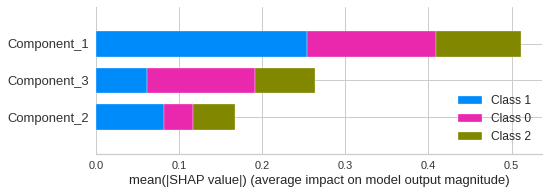

In [76]:
interpret_model(tuned_rf_pca, plot='summary')

In [77]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [78]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [79]:
interpret_model(tuned_rf_pca, plot='reason')